In [1]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np



In [4]:
# load the data
# notebook path
curent_dir = os.path.dirname(os.path.abspath("__file__"))
data_dir = os.path.join(curent_dir, '../dev_pendulum/temp-data/')
algo = 'mpc'
system = 'pendulum'
task = 'stabilization'
L = 0.5
data_file = f'{algo}_data_{system}_{task}_{L}.pkl'
abs_data_path = os.path.join(data_dir, data_file)
print('abs_data_path: ', abs_data_path)
with open(abs_data_path, 'rb') as f:
    data = pickle.load(f)

L_small = 0.8
data_file_small = f'{algo}_data_{system}_{task}_{L_small}.pkl'
abs_data_path_small = os.path.join(data_dir, data_file_small)
print('abs_data_path_small: ', abs_data_path_small)
with open(abs_data_path_small, 'rb') as f:
    data_small = pickle.load(f)

L_large = 2.5
data_file_large = f'{algo}_data_{system}_{task}_{L_large}.pkl'
abs_data_path_large = os.path.join(data_dir, data_file_large)
print('abs_data_path_large: ', abs_data_path_large)
with open(abs_data_path_large, 'rb') as f:
    data_large = pickle.load(f)

print('data.keys(): ', data.keys())
print('data[trajs_data].keys()', data['trajs_data'].keys())
# print('data[trajs_data][obs]', data['trajs_data']['obs'])
state = data['trajs_data']['obs'][0]
action = data['trajs_data']['action'][0]

state_small = data_small['trajs_data']['obs'][0]
action_small = data_small['trajs_data']['action'][0]

state_large = data_large['trajs_data']['obs'][0]
action_large = data_large['trajs_data']['action'][0]


abs_data_path:  /home/tumeilsy-mo-10/Repositories/scg_mx/safe_control_gym/experiments/MI/../dev_pendulum/temp-data/mpc_data_pendulum_stabilization_0.5.pkl
abs_data_path_small:  /home/tumeilsy-mo-10/Repositories/scg_mx/safe_control_gym/experiments/MI/../dev_pendulum/temp-data/mpc_data_pendulum_stabilization_0.8.pkl
abs_data_path_large:  /home/tumeilsy-mo-10/Repositories/scg_mx/safe_control_gym/experiments/MI/../dev_pendulum/temp-data/mpc_data_pendulum_stabilization_2.5.pkl
data.keys():  dict_keys(['trajs_data', 'metrics'])
data[trajs_data].keys() dict_keys(['obs', 'info', 'state', 'action', 'done', 'reward', 'length', 'current_physical_action', 'current_noisy_physical_action', 'current_clipped_action', 'timestamp', 'controller_data'])


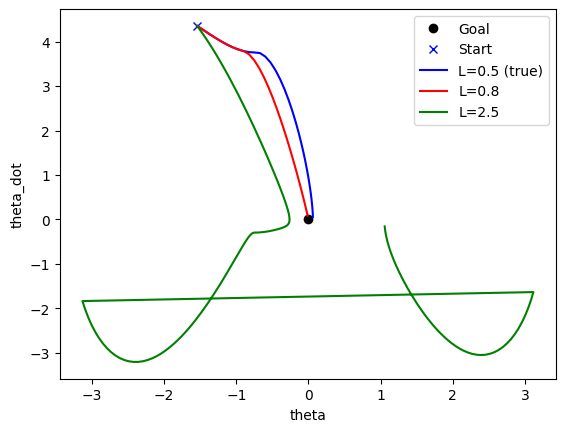

In [15]:
# Plot the trajectories
plt.figure()
plt.plot(0, 0, 'ko',label='Goal')
plt.plot(state[0, 0], state[0, 1], 'bx', label='Start')
plt.plot(state[:, 0], state[:, 1], 'b', label='L=0.5 (true)')
plt.plot(state_small[:, 0], state_small[:, 1], 'r', label='L=0.8')
plt.plot(state_large[:, 0], state_large[:, 1], 'g', label='L=2.5')
plt.xlabel('theta')
plt.ylabel('theta_dot')
plt.legend()
plt.show()